In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = ["Times New Roman"]

In [3]:
def format_number(num):
    if num >= 1_000_000:
        return f"{num / 1_000_000:.0f}M"
    elif num >= 100_000:
        return f"{round(num / 100000) * 100:.0f}k"
    elif num >= 1000:
        return f"{round(num / 10000) * 10:.0f}k"
    return str(num)

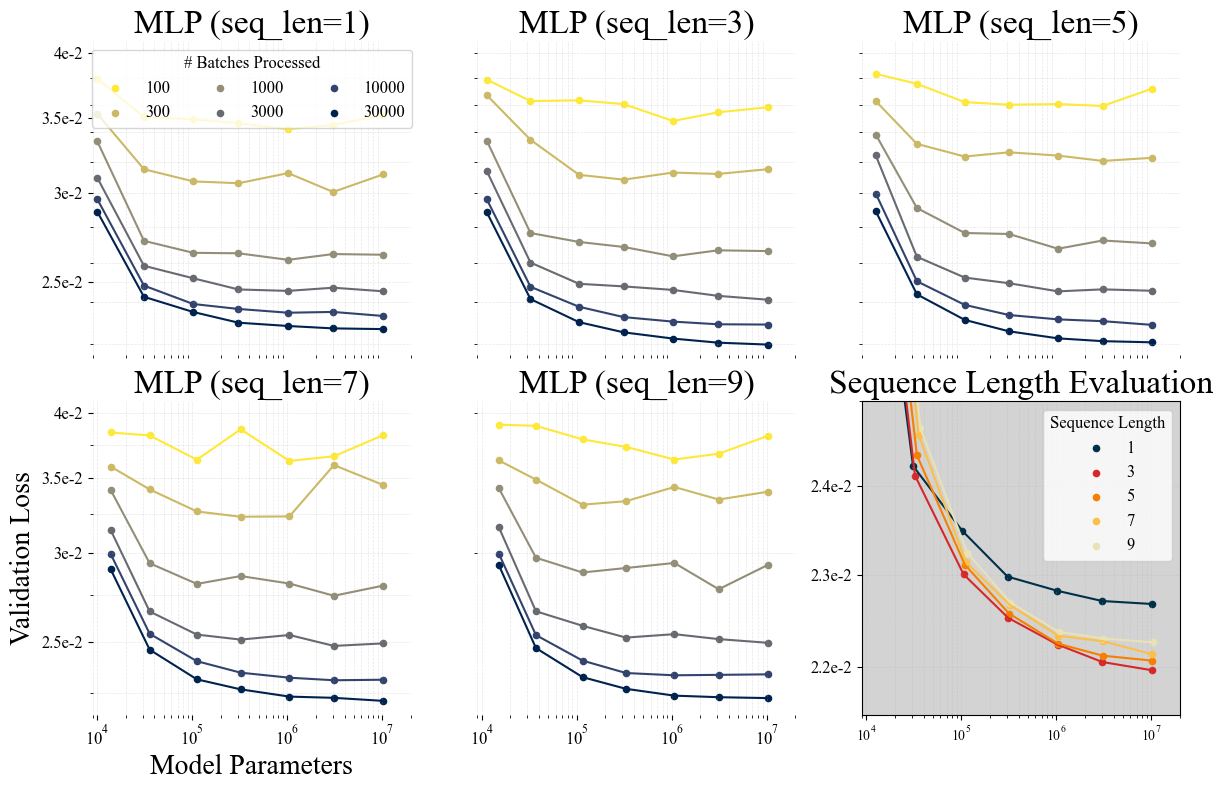

In [4]:
data = pd.read_csv('models/trackers/7111.csv', header=None)
data.columns = ['model_name', 'seq_len', 'model_params', 'batch_counter', 'loss', 'asctime']
data['model_params_scale'] = data['model_params'].apply(format_number)

model_color_dict = {
    1: '#003049',
    3: '#d62828',
    5: '#f77f00',    
    7: '#fcbf49',
    9: '#eae2b7',
}

cmap = plt.get_cmap('cividis_r')
plt.rcParams['figure.figsize'] = [12, 8]
for model_name in data['model_name'].unique():
    if model_name not in ['MLP']:
        continue
    for model_seq_len in data['seq_len'].unique():
        # if model_seq_len != 1:
        #     continue
        plt.subplot(2, 3, int(model_seq_len/2) + 1)
        for model_batch_counter in data['batch_counter'].unique()[4:]:
            data_model = data[(data['model_name'] == model_name) & (data['seq_len'] == model_seq_len) & (data['batch_counter'] == model_batch_counter)]
            plt.scatter(data_model['model_params'], data_model['loss'], color=cmap((np.log(model_batch_counter) - 4.6)/5.7), s=20, label=model_batch_counter)
            plt.plot(data_model['model_params'], data_model['loss'], color=cmap((np.log(model_batch_counter) - 4.6)/5.7))
            # print(np.log(model_batch_counter), (np.log(model_batch_counter) - 3.4)/6.9)

        plt.xscale('log')
        plt.yscale('log');
        plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.3)
        plt.yticks(minor=True, ticks=plt.yticks(minor=True)[0], labels=[])
        plt.ylim(2.15e-2, 4.1e-2)
        plt.xlim(9e3, 2e7)
        if model_seq_len in [1, 7]:
            plt.yticks([2.5e-2, 3e-2, 3.5e-2, 4e-2], ['2.5e-2', '3e-2', '3.5e-2', '4e-2'], fontsize=12)
        if model_seq_len == 7:
            plt.ylabel('Validation Loss', fontsize=20)
            plt.xlabel('Model Parameters', fontsize=20)
        if model_seq_len in [1, 3, 5]:
            plt.xticks([])
        else:
            plt.xticks(fontsize=12)
        plt.title(f'{model_name} (seq_len={model_seq_len})', fontsize=24)
        
        plt.box(False)

plt.subplot(2, 3, 6)
for model_name in data['model_name'].unique():
    if model_name not in ['MLP']:
        continue
    for model_seq_len in data['seq_len'].unique():
        model_batch_counter = data['batch_counter'].unique()[-1]
        data_model = data[(data['model_name'] == model_name) & (data['seq_len'] == model_seq_len) & (data['batch_counter'] == model_batch_counter)]
        plt.scatter(data_model['model_params'], data_model['loss'], color=model_color_dict[model_seq_len], s=20, label=model_seq_len)
        plt.plot(data_model['model_params'], data_model['loss'], color=model_color_dict[model_seq_len])
plt.xscale('log')
plt.yscale('log');
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.3)
plt.yticks(minor=True, ticks=plt.yticks(minor=True)[0], labels=[])
plt.ylim(2.15e-2, 2.5e-2)
plt.yticks([2.2e-2, 2.3e-2, 2.4e-2], ['2.2e-2', '2.3e-2', '2.4e-2'], fontsize=12)
plt.xlim(9e3, 2e7)
# plt.ylabel('Validation Loss', fontsize=12)
# plt.xlabel('Model Parameters', fontsize=12)
plt.title(f'Sequence Length Evaluation', fontsize=24)
plt.legend(title='Sequence Length', fontsize=12, title_fontsize=12, loc='upper right');
plt.gcf().get_axes()[-1].patch.set_facecolor('#d3d3d3')


plt.subplot(2, 3, 1)
plt.legend(title='# Batches Processed', fontsize=12, title_fontsize=12, loc='upper center', ncol=3);
plt.tight_layout()
plt.savefig('output/phd/7201-benchmarking-mlp.pdf', bbox_inches='tight')

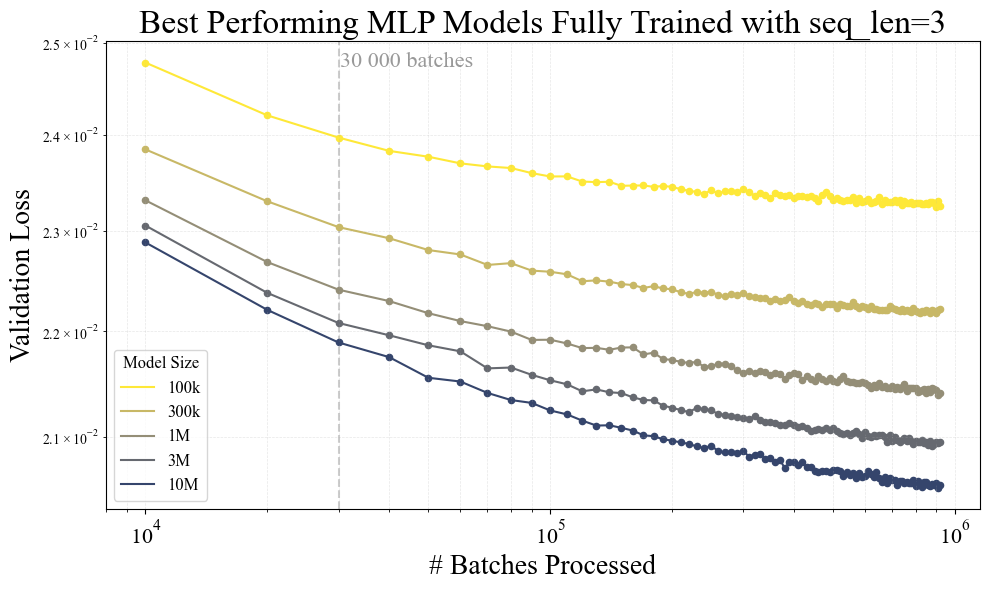

In [5]:
data = pd.read_csv('models/trackers/7112_definitive.csv', header=None)
data.columns = ['model_name', 'seq_len', 'model_params', 'epoch', 'batch_counter', 'loss', 'asctime']
data['model_params_scale'] = data['model_params'].apply(format_number)

model_color_dict = {
    'MLP': '#003049',
    'MLPSplit': '#003049',
    'Transformer': '#d62828',
    'Informer': '#d62828',
    'FlatLSTM': '#f77f00',    
    'LSTM': '#f77f00',    
    '0': '#fcbf49',
    '1': '#eae2b7',
}

cmap = plt.get_cmap('cividis_r')
plt.rcParams['figure.figsize'] = [10, 6]
for model_name in data['model_name'].unique():
    if model_name not in ['MLP']:
        continue
    for i, model_size in enumerate(data['model_params_scale'].unique()):
        data_model = data[(data['model_name'] == model_name) & (data['model_params_scale'] == model_size)]
        plt.plot(data_model['batch_counter'], data_model['loss'], label=model_size, color=cmap(i/len(data['model_params'].unique())))
        plt.scatter(data_model['batch_counter'], data_model['loss'], color=cmap(i/len(data['model_params'].unique())), s=20)

        plt.xscale('log')
        plt.yscale('log');
        plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.3)
        plt.ylabel('Validation Loss', fontsize=20)
        plt.xlabel('# Batches Processed', fontsize=20)
        plt.title(f'Best Performing MLP Models Fully Trained with seq_len=3', fontsize=24)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(30_000, zorder=-1, ls='--', color='black', alpha=0.2)
plt.text(30_300, 2.49e-2, '30 000 batches', fontsize=16, ha='left', va='top', alpha=0.4, color='black')
# plt.subplot(1, 5, 1)
plt.legend(title='Model Size', fontsize=12, title_fontsize=12, loc='lower left');
plt.tight_layout()
plt.savefig('output/phd/7201-7112-benchmarking-mlp-full.pdf', bbox_inches='tight')